## Recurrent Neural Network


- RNN은 Autoregressive 모형과 비슷한 방법으로 입력신호의 순서에 대한 정보를 저장한다. <br>
<br>
$$\begin{eqnarray} y_t &=& \beta \cdot y_{t-1} +  \varepsilon_{t-1} \\
&=& \beta \cdot (\beta \cdot y_{t-2} +  \varepsilon_{t-2}) +  \varepsilon_{t-1} \\
&=& \beta^2 \cdot (\beta \cdot y_{t-3} +  \varepsilon_{t-3}) + \beta\cdot  \varepsilon_{t-2} +  \varepsilon_{t-1} \\
& & \vdots \\
&=& \beta^t \cdot y_0 + \beta^{t-1} \varepsilon_1 + \beta^{t-2} \varepsilon_2 + \cdots + \beta \varepsilon_{t-2} + \varepsilon_{t-1}
\end{eqnarray}$$
<br>
현재까지 추가된 모든 정보는 $y_{t-1}$에 요약이 되어 있다.
<br><br>



### Traditional RNN

- 요즘은 기본 RNN 모형을 독립적으로 사용하는 경우는 거의 없다.<br>
모든 파생모형들을의 기본이므로 구조와 용어를 중심으로 살펴본다.

<img src="rnn1.png" width="600">

- 순서를 명시적으로 고려하여 과거의 정보를 recurrent state 혹은 state vector $h_t$로 요약
- 길이에 관계없이 모든 layer에 동일한 weight를 사용하여 추정모수의 수 감소


- RNN은 입력신호를 hidden state $h_t$와 input $x_t$으로 구분하여 관리한다. <br>
- Hidden state는 정보가 추가되면서 계속 update된다. <br>


- 응용 <br>
image capture <br>
time series <br>
natural language processing <br>
translation <br>

$$\begin{eqnarray} h_t &=& U \cdot x_{t-1} + W \cdot h_{t-1}\\
&=& U \cdot x_{t-1} + W \cdot (W \cdot h_{t-2} + U \cdot x_{t-2})\\
&=& U \cdot x_{t-1} + W\cdot U \cdot x_{t-2} + W^2 \cdot h_{t-2} \\
&=& (U \cdot x_{t-1}) + W (U \cdot x_{t-2}) + \cdots +W^{t-1} (U \cdot x_1) + W^{t} (U \cdot x_0) +  W^t \cdot h_0
\end{eqnarray}$$

실제 RNN 모형은 여러 개의 dense layer를 연결하고 weight에 제약을 가한 것이다.

<img src="rnn2.png" width="250">

### 응용 분야

Text data<br>
Speech data<br>
Classification prediction problems<br>
Regression prediction problems<br>
Generative models<br>

적합하지 않은 분야 - 주의해서 사용

Tabular data<br>
Image data<br>
*Time series data*<br>

### 표기법

$$\begin{eqnarray}
z_t &=& U^\intercal x_t + W h_{h-1} + b\\
h_t &=& a(z_t) \\
o_t &=& g(Vh_t + c)
\end{eqnarray}$$

- $U$는 input의 shape을 정규화하기 위한 행렬
- RNN의 각 unit은 $U, W, b, V, c$ 등 총 5개의 weight와 bias를 갖는다. <br>
기본 RNN 모형에선 모든 hidden layer의 규격과 parameter에 동일한 값을 사용한다.<br>
Tensorflow에서 weight는 list로 정리하며 $U, W, b, V, c$의 순서로 되어 있다.
- Default activation function은 tanh를 사용한다. 대부분의 RNN관련 모형의 default 값이다.


- hidden layer의 unit 수를 $m$, 최종 output 계산을 위한 dense layer의 unit 수를 $C$라고 하면,

$U$ | $W$ | $b, b_{h}$ | $V$ | $c, b_{\text{out}}$ | $z$ | $h$ | $o, y$ | 
:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
$\mathbb{R}^{K \times m}$ | $\mathbb{R}^{m \times m}$ | $\mathbb{R}^{m}$ | $\mathbb{R}^{m \times C}$ | $\mathbb{R}^C$ | $\mathbb{R}^m$ | $\mathbb{R}^m$ | $\mathbb{R}^C$ | 
(n_feature $\times$ n_units)|(n_units $\times$ n_units)|(n_units)|(dim_out $\times$ n_units)|(dim_out)

&ensp;&ensp;&ensp;&nbsp; 실제 계산에선 입력에 row vector를 사용하므로 transpose 행렬의 크기가 될 수 있다.

### RNN Layer

- Tensorflow를 이용하여 RNN을 구현할 때는 tf.keras.layers.SimpleRNN을 사용한다.<br> 

```python
tf.keras.layers.SimpleRNN(
    units, activation='tanh', use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros', kernel_regularizer=None,
    recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, recurrent_constraint=None, bias_constraint=None,
    dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False,
    go_backwards=False, stateful=False, unroll=False, **kwargs
)
```

- Kernel은 Dense layer의 weight에 해당하는 $U$, 즉 input의 선형변환을 위한 weight
- Recurrent kernel은 recurrent state $h$의 선형변환에 사용하는 weight $W$이다.


- regularization을 사용한 code는 보기 어려우며, regulaization 용도로는 대부분 dropout을 사용한다.


- 모든 deep learning 모형에서 입력 tensor의 차원에 관계없이 `input_shape`의 첫 번째 축은 batch_size,<br>
두 번째 축은 timestep으로 해석하면 편리하다.

- State vector $h_t$의 차원 $m$은 units로 설정하고,
- input vector의 timesteps는 recurrent state의 반복 횟수를 결정한다.


- SimpleRNN의 output은 hidden state unit 들의 output $z\in \mathbb{R}^m$ 이다.
- 이후 Dense layer 등으로 최종 output $o$를 계산할 떄 사용하는 weight가 $V, c$이다.


- return_sequences 는 전체 timestep의 hidden state를 output으로 출력할지 여부를 결정
- return_state는 제일 마지막 layer의 hidden state와 cell state를 같이 return
- stateful은 각 batch에 사용하는 weight를 reset할지를 선택한다. 표본들 사이에 분석에 도움이 되는 관계가 없다면 굳이 사용하지 않는다.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

unit의 수가 4이고 tanh를 activation function으로 사용한 RNN layer는 다음과 같이 구성한다.

In [2]:
x = np.array([[0, 1, 2], [3, 4, 5]], dtype='float32').reshape(-1,2,3)

n_units = 4

rnn_layer = tf.keras.layers.SimpleRNN(n_units, name='RNN')

print('input: \n', x)
print('output, z: (', n_units, '\b,)\n', np.round(rnn_layer(x), 3))

u, w, b = rnn_layer.get_weights()

print('weight U:', u.shape, ' \n', u)
print('weight W:', w.shape, '  \n', w)
print('weight b:', b.shape, '  \n', b)

print('recurrent state activation function: \n', rnn_layer.activation)

input: 
 [[[0. 1. 2.]
  [3. 4. 5.]]]
output, z: ( 4 ,)
 [[ 1.     0.964  0.168 -0.887]]
weight U: (3, 4)  
 [[ 0.92274976 -0.11427003  0.23029554 -0.27325583]
 [-0.43943247 -0.18050021  0.27499604 -0.11699826]
 [ 0.8596952   0.6194228  -0.5140269  -0.09086508]]
weight W: (4, 4)   
 [[ 0.96171296  0.26783147  0.01029724 -0.05717021]
 [ 0.03504864 -0.2342049   0.9086317  -0.34396002]
 [ 0.03302662 -0.2882406  -0.4039757  -0.86754274]
 [-0.26979432  0.88900614  0.10529259 -0.35467264]]
weight b: (4,)   
 [0. 0. 0. 0.]
recurrent state activation function: 
 <function tanh at 0x000002A90B3229D0>


- U, W, b 세 개의 weight는 전체 recurrent state에서 공유하므로 weight의 shape은 timestep과 무관하게 결정된다.
 - U는 input의 차원을 조정하기 위한 것으로 $x$가 $(1,2,3)$이므로 shape은 $(\text{n_feature}, \text{n_unit})=(3,4)$
 - W는 recurrent state로 shape은 $\text{n_unit} \times \text{n_unit}$ 이다.
 - 아직 fit 이전이므로 U, W, b는 모두 initial value 들이다.

- 여기에 output layer를 추가하면 RNN 모형을 구성할 수 있다.

In [3]:
rnn = tf.keras.Sequential(name='Vanilla RNN Model')

inputs = tf.keras.layers.InputLayer(input_shape=(2,3), name='input')
output_layer = tf.keras.layers.Dense(1, name='output')

rnn = tf.keras.Sequential([
    inputs,
    rnn_layer,
    output_layer],    
    name='Vanilla RNN Model')

v, c = rnn.get_weights()[-2:]

print('weight V:', v.shape, '  \n', v)
print('weight c:', c.shape, '  \n', c)
print('output activation function: \n', output_layer.activation)
print()
rnn.summary()

#tf.keras.utils.plot_model(rnn, show_shapes=True)

weight V: (4, 1)   
 [[ 0.2045027 ]
 [ 0.15205944]
 [-0.7503971 ]
 [ 0.42492306]]
weight c: (1,)   
 [0.]
output activation function: 
 <function linear at 0x000002A90B3260D0>

Model: "Vanilla RNN Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 RNN (SimpleRNN)             (None, 4)                 32        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


### compile and fitting
 
- 학습을 통해 weight를 결정하려면 평가기준과 fitting 과정에 필요한 parameter들을 지정해 주어야 한다.

In [4]:
rnn.compile(loss='mean_squared_error', optimizer='adam')
tf.keras.utils.plot_model(rnn, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


## RNN vs. DNN for time series data

효율성 문제이긴 하지만 DNN 역시 시계열자료 분석에 많이 사용된다.

DNN에 과거 자료를 사용한 (autoregressive 형태) 모형과 RNN을 비교해 보자.<br>
여기선 성과보다는 모형의 차이점을 눈여겨 본다.

In [5]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, SimpleRNN, TimeDistributed

In [6]:
def plot_loss(loss, optimizer, ax):
    
    ax.plot(loss, lw=.8)
    
    loss_max, loss_min = np.max(loss), np.min(loss)
    loss_range = loss_max - loss_min
    
    ax.set_ylim(loss_min-loss_range*0.1, loss_max+loss_range*0.1)
    ax.set_xlabel('epoch', fontsize=12)
    ax.set_ylabel('MSE', fontsize=12)
    ax.set_title(f'Optimizer: "{optimizer}", loss: {loss[-1]:.2f}', fontsize=14)
    ax.grid()
    
from sklearn.metrics import mean_squared_error, r2_score

def plot_mse_score(y_true, y_hat, ax, series='fitted_values'):
 
    err = y_true-y_hat.flatten()
    y_ = np.max(err) + np.abs(np.min(y_true))
    
    ax.plot(y_true + y_, color='green', label=r'true $y_t$')
    ax.plot(y_hat + y_, color='navy', label=series)
    ax.plot(err, color='gray', label='errors')
    
    ax.set_ylabel(r'$y_t$, $\hat{y}$, errors', fontsize=14)
    ax.legend(fontsize=14)
    ax.grid()
 
    return mean_squared_error(y_true, y_hat), r2_score(y_true, y_hat)

- 자료는 ARMA(2,1) process를 생성하여 사용한다.
- `arma_generate_sample`의 계수 부분에는 다음 식의 계수를 부호 그대로 입력한다. [참고](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.ArmaProcess.html)

$$ (a_0=1) y_t - a_1 y_{t-1} - a_2 y_{t-2} - \cdots - a_p y_{t-p} 
= (m_0=1) \varepsilon_t + m_1 \varepsilon_{t-1} + \cdots + m_q \varepsilon_{t-q}$$

$$ (y_t-\text{const})(a_0 - a_1 B - a_2 B^{2} - \cdots - a_p B^{p} 
= \varepsilon_t \left(1+ m_1 B + \cdots + m_q B^{q}\right)$$

In [7]:
from statsmodels.tsa.arima_process import arma_generate_sample

np.random.seed(42)
data = arma_generate_sample(ar=[1, -.8, .5], ma=[1, 0.7], nsample=160, scale=1)

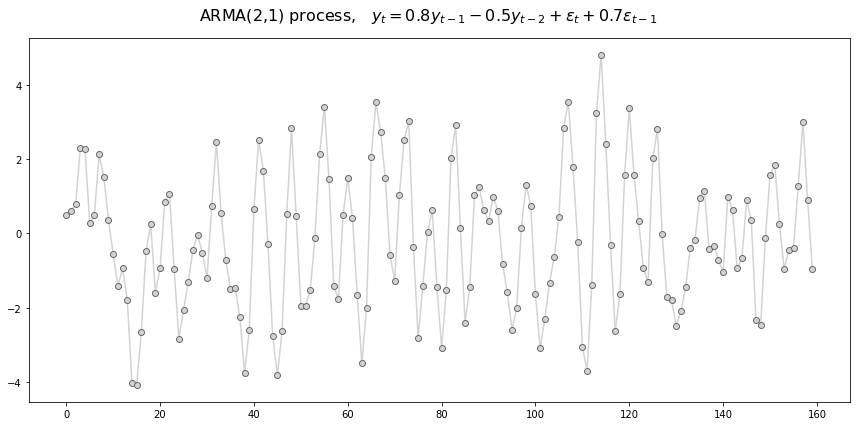

In [8]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data, "o-", color='lightgray', markerfacecolor='lightgray', markeredgecolor='dimgray')
plt.suptitle(r'ARMA(2,1) process,   $y_t = 0.8 y_{t-1} - 0.5 y_{t-2} + \varepsilon_t + 0.7 \varepsilon_{t-1}$', fontsize=16)
plt.tight_layout();

### 입력 자료의 준비

- 과거 5기까지의 자료를 사용하여 다음 기를 예측하는 모형을 비교한다.


- DNN의 입력은 2D, RNN의 입력은 3D이다.
 - DNN의 입력은 (batch_size, timesteps)
 - RNN의 입력은 (batch_size, timesteps, 1)


- AR 모형에서 input feature가 하나라면 feature의 toeplitz 변환을 통해 크기가 `(None,timesteps)`인 array를 만들고 다시 `(None,timesteps,1)`으로 reshape을 하여 사용한다.


- 입력자료를 준비할 때 필수적인 과정이므로 함수로 지정해 사용하는 것도 나쁘지 않다. <br>
[Toeplitz matrix](https://en.wikipedia.org/wiki/Toeplitz_matrix)를 이용하면 lagged feature룰 쉽게 만들 수 있다.


- 전체 기간에 걸친 객관적인 평가를 위해 training dataset과 test dataset 사이 10기간의 표본은 사용하지 않는다.

In [9]:
timesteps = 5

In [10]:
#%%timeit

x_train, x_test = [], []
y_train, y_test = [], []

for i in range(timesteps, 120):
    x_train.append(data[i-timesteps:i])
    y_train.append(data[i])
    
for i in range(120+timesteps, 160):
    x_test.append(data[i-timesteps:i])
    y_test.append(data[i])    
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

In [11]:
print('training dataset', x_train.shape, y_train.shape)
print('test dataset', x_test.shape, y_test.shape)

training dataset (115, 5) (115,)
test dataset (35, 5) (35,)


In [12]:
import numpy as np
from scipy.linalg import toeplitz

def to_timesteps(seq, timesteps):
    
    null = np.empty(timesteps+1,)
    null[:] = np.nan
    
    # increasing order in time, x-k, ..., x-1, x
    data = np.fliplr(toeplitz(seq, null)[timesteps:,:])  
        
    return data[:,:-1], data[:, -1]

In [13]:
#%timeit 
x_train, y_train = to_timesteps(data[:120], timesteps)
x_test, y_test = to_timesteps(data[120:], timesteps)

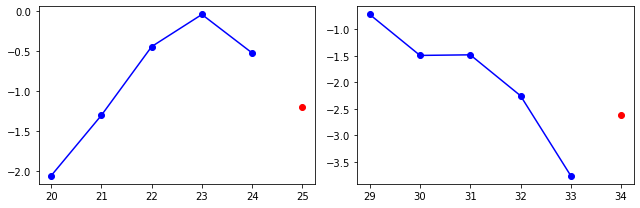

In [14]:
fig, ax = plt.subplots(1,2,figsize=(9,3))

for i, t in enumerate([20,29]):
    
    ax[i].plot(range(t,t+timesteps), y_train[t:t+timesteps], "bo-")
    ax[i].plot(t+timesteps, y_train[t+timesteps], "ro")
    
plt.tight_layout()

### Perceptron

- Perceptron 에선 모든 lagged variable의 계수값이 독립적이라고 가정한다.
- 총 6개의 모수를 추정하게 된다.
- OLS의 회귀식과 동일한 구조를 갖는다.

$$ y_t = w_1 y_{t-1} + \cdots + w_5 y_{t-5} + b$$

In [15]:
dnn = tf.keras.Sequential(Dense(1, input_dim=timesteps),
                          name='perceptron')
dnn.summary()

Model: "perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [16]:
dnn.get_weights()

[array([[ 0.18063569],
        [ 0.9128289 ],
        [-0.09508085],
        [ 0.02839732],
        [ 0.70093465]], dtype=float32),
 array([0.], dtype=float32)]

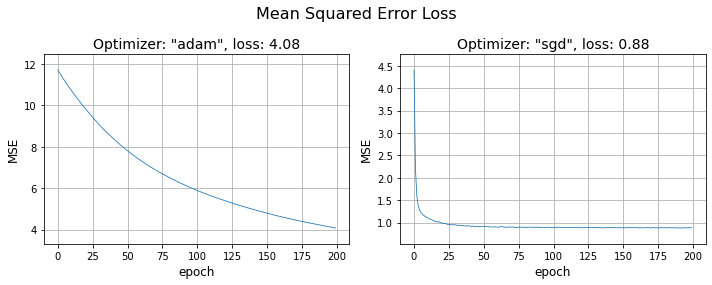

In [17]:
tf.random.set_seed(42)
epochs = 200

fig, ax = plt.subplots(1,2,figsize=(10,4))

optimizers = ['adam', 'sgd']

for i, optimizer in enumerate(optimizers):
    
    
    tf.keras.backend.clear_session()
    
    dnn = tf.keras.Sequential(Dense(1, input_dim=timesteps))
    dnn.compile(loss='mse',optimizer=optimizer)
    
    history = dnn.fit(x_train, y_train, epochs=epochs, verbose=0)
    
    loss = history.history['loss']
    
    plot_loss(loss, optimizer, ax[i])
    
plt.suptitle('Mean Squared Error Loss', fontsize=16)
plt.tight_layout();

아래 그림에서 자료와 예측값은 오차와 구분하기 위해 그래프를 위로 이동시켰다.

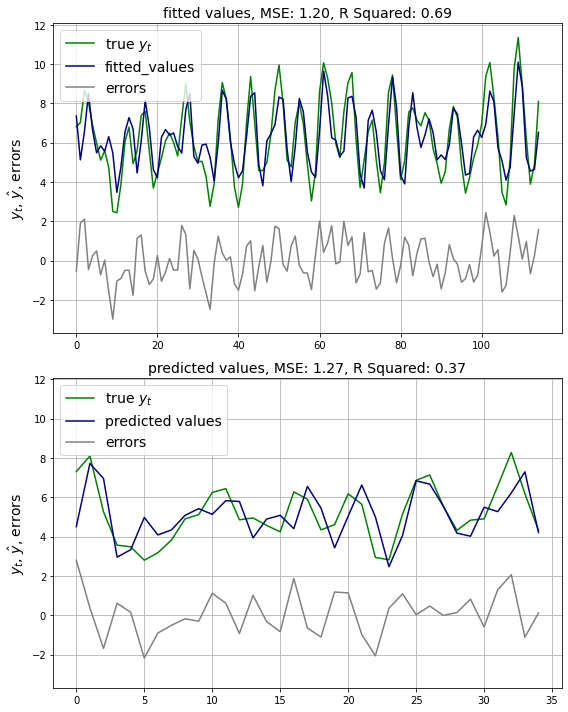

In [18]:
tf.random.set_seed(42)
epochs = 1_000

dnn = tf.keras.Sequential(Dense(1, input_dim=timesteps))
dnn.compile(loss='mse',optimizer='adam')
dnn.fit(x_train, y_train, epochs=epochs, verbose=0)

y_fit = dnn.predict(x_train)
y_pred = dnn.predict(x_test)

fig, (ax0, ax1) = plt.subplots(2,1,figsize=(8,10), sharey=True)

mse, r2 = plot_mse_score(y_train, y_fit, ax0)
ax0.set_title(f'fitted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)

mse, r2 = plot_mse_score(y_test, y_pred, ax1, series='predicted values')
ax1.set_title(f'predicted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)    
 
plt.tight_layout();

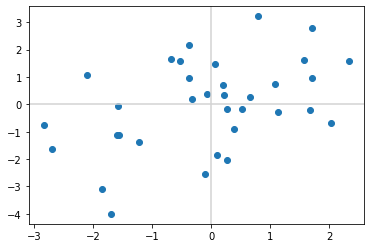

In [19]:
plt.plot(np.diff(y_test), np.diff(y_pred.flatten()),"o")
plt.axhline(y=0, color='lightgray')
plt.axvline(x=0, color='lightgray')

### Vanilla RNN

- RNN에서는 timesteps와는 무관하게 recurrent state는 unit의 수에 따라 추정할 모수의 수가 결정된다.
- 1개의 unit을 사용한다면 hidden layer에서 추정할 모수의 수는 weight 1개와 bias 1개, 총 2개가 된다.
- U, V, c가 추가되므로 총 5개의 모수를 추정하며, 실질적으로 4개 값을 추정한다.

$$ y_t = V \tanh(W (U y_{t-1}) + b) + c, \quad  \text{ for all } t$$

In [20]:
x_train_rnn = x_train.reshape(-1, timesteps, 1)
x_test_rnn = x_test.reshape(-1, timesteps, 1)


inputs = tf.keras.Input(shape=(timesteps, 1), name='input')
output = tf.keras.layers.SimpleRNN(1)(inputs)
output = Dense(units=1, activation='linear', name='output')(output)

rnn = tf.keras.models.Model(inputs=inputs, outputs=output, name='vanilla_RNN')

rnn.compile(loss='mean_squared_error', optimizer='adam')
rnn.summary()

Model: "vanilla_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 5, 1)]            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [21]:
rnn.get_weights()

[array([[0.65087426]], dtype=float32),
 array([[-1.]], dtype=float32),
 array([0.], dtype=float32),
 array([[0.83218396]], dtype=float32),
 array([0.], dtype=float32)]

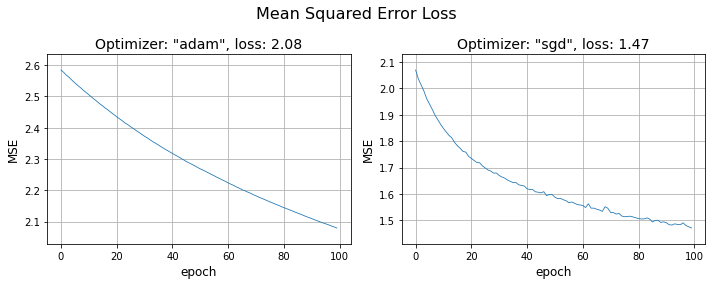

In [22]:
epochs = 100

fig, ax = plt.subplots(1,2,figsize=(10,4))

optimizers = ['adam', 'sgd']

for i, optimizer in enumerate(optimizers):
    
    tf.keras.backend.clear_session()
    
    rnn = tf.keras.models.Model(inputs=inputs, outputs=output)
    rnn.compile(loss='mse',optimizer=optimizer)
    history = rnn.fit(x_train_rnn, y_train, epochs=epochs, verbose=0)
    
    loss = history.history['loss']
    
    plot_loss(loss, optimizer, ax[i])
    
plt.suptitle('Mean Squared Error Loss', fontsize=16)
plt.tight_layout();

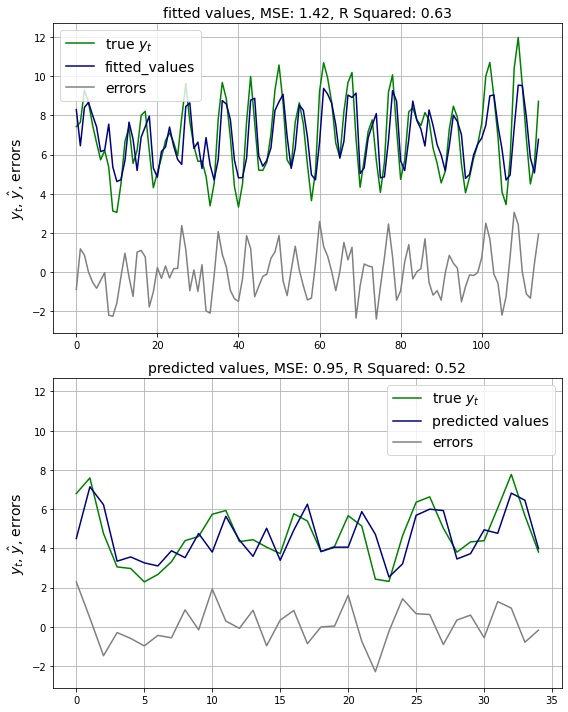

In [23]:
tf.keras.backend.clear_session()

rnn = tf.keras.models.Model(inputs=inputs, outputs=output)
rnn.compile(loss='mse',optimizer='adam')
rnn.fit(x_train_rnn, y_train, epochs=epochs, verbose=0)

y_fit = rnn.predict(x_train_rnn)
y_pred = rnn.predict(x_test_rnn)

fig, (ax0, ax1) = plt.subplots(2,1,figsize=(8,10), sharey=True)

mse, r2 = plot_mse_score(y_train, y_fit, ax0)
ax0.set_title(f'fitted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)

mse, r2 = plot_mse_score(y_test, y_pred, ax1, series='predicted values')
ax1.set_title(f'predicted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)    
 
plt.tight_layout();

비교한 DNN과 RNN의 차이는 activation function과 추정모수의 갯수이다.
RNN의 경우 overfitting 문제가 현저히 감소한 것으로 보이며, 비선형성으로 인한 것인지 모수의 수를 줄여 fitting의 여력을 남긴 것인지 분명하지 않다.

아래 결과를 보면 구체적인 시간의 모형화의 영향이라기 보다는 비선형성이 결과에 영향을 미친 것으로 보인다.

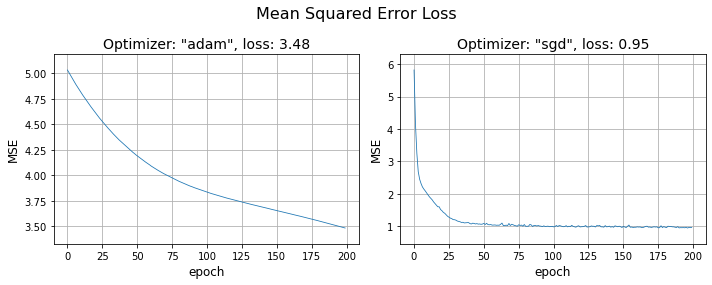

In [24]:
tf.random.set_seed(42)
epochs = 200

fig, ax = plt.subplots(1,2,figsize=(10,4))

optimizers = ['adam', 'sgd']

for i, optimizer in enumerate(optimizers):
    
    
    tf.keras.backend.clear_session()
    
    dnn = tf.keras.Sequential([
        Dense(1, input_dim=timesteps),
        Dense(1, activation='tanh'),
        Dense(1, activation='linear')])
    dnn.compile(loss='mse',optimizer=optimizer)
    
    history = dnn.fit(x_train, y_train, epochs=epochs, verbose=0)
    
    loss = history.history['loss']
    
    plot_loss(loss, optimizer, ax[i])
    
plt.suptitle('Mean Squared Error Loss', fontsize=16)
plt.tight_layout();

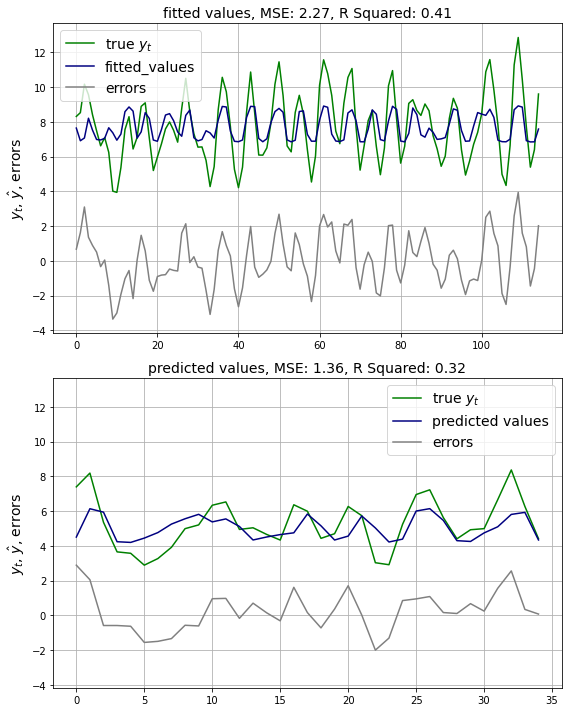

In [25]:
tf.keras.backend.clear_session()
dnn = tf.keras.Sequential([
    Dense(1, input_dim=timesteps),
    Dense(1, activation='tanh'),
    Dense(1, activation='linear')])
dnn.compile(loss='mse',optimizer='adam')
dnn.fit(x_train, y_train, epochs=epochs, verbose=0)

y_fit = dnn.predict(x_train)
y_pred = dnn.predict(x_test)

fig, (ax0, ax1) = plt.subplots(2,1,figsize=(8,10), sharey=True)

mse, r2 = plot_mse_score(y_train, y_fit, ax0)
ax0.set_title(f'fitted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)

mse, r2 = plot_mse_score(y_test, y_pred, ax1, series='predicted values')
ax1.set_title(f'predicted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)    
 
plt.tight_layout();

In [26]:
import statsmodels.api as sm

X = sm.add_constant(x_train)
ols = sm.OLS(y_train, X).fit()
ols.summary()

C:\Users\K5\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\K5\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     73.73
Date:                Thu, 26 May 2022   Prob (F-statistic):           2.29e-33
Time:                        22:03:31   Log-Likelihood:                -155.28
No. Observations:                 115   AIC:                             322.6
Df Residuals:                     109   BIC:                             339.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1057      0.092     -1.144      0.255      -0.289       0.077
x1             0.1140      0.095      1.196      0.234      -0.075       0.303
x2            -0.2932      0.164     -1.788      0.077      -0.618       0.032
x3             0.7239      0.199      3.641      0.000       0.330       1.118
x4            -1.3960      0.163     -8.538      0.000      -1.720      -1.072
x5             1.4278      0.096     14.931      0.000       1.238       1.617
==============================================================================
Omnibus:                        0.464   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.616
Skew:                          -0.113   Prob(JB):                        0.735
Kurtosis:                       2.721   Cond. No.                         9.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

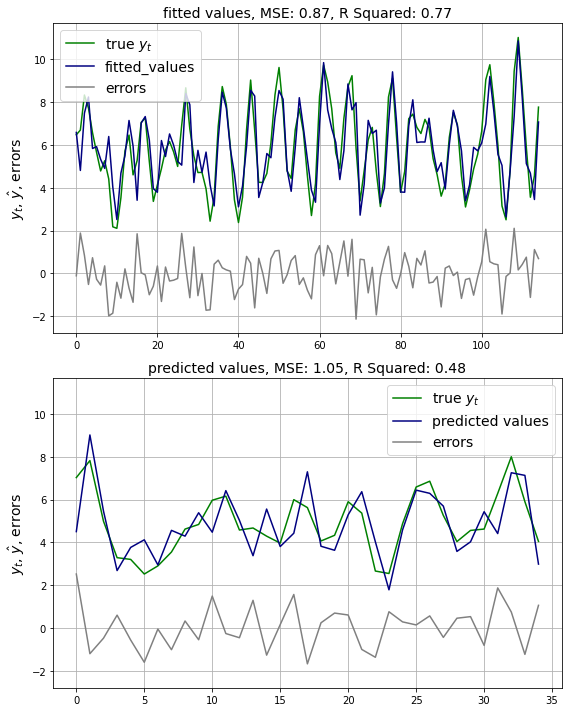

In [27]:
y_fit = ols.fittedvalues
y_pred = ols.predict(sm.add_constant(x_test))

fig, (ax0, ax1) = plt.subplots(2,1,figsize=(8,10), sharey=True)

mse, r2 = plot_mse_score(y_train, y_fit, ax0)
ax0.set_title(f'fitted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)

mse, r2 = plot_mse_score(y_test, y_pred, ax1, series='predicted values')
ax1.set_title(f'predicted values, MSE: {mse:.2f}, R Squared: {r2:.2f}', fontsize=14)    
 
plt.tight_layout();

## 예제: GDP 예측

- 과거 자료를 이용하여 1분기와 4분기 이후의 GDP를 예측, [참고 모형](https://www.frontiersin.org/articles/10.3389/frai.2021.757864/full)

- Target: 한국 분기별 [GDP seasonally adjusted](https://fred.stlouisfed.org/tags/series?t=gdp%3Bkorea%3Bquarterly)

- Features
- 국고채 3년, 5년, 10년, 회사채 3년, CD 91일물, 콜금리, 기준금리, CPI, 실업률, 전기사용량 등등


- OLS
$$ y_t = \beta_0 + \sum^n_{k=1} \beta_k x_{k,t}+ \varepsilon_t $$
- AR(p)
$$ y_t = \sum^p_{i=1} \alpha_i y_{t-i}+ \varepsilon_t$$
- ARX(p)
$$ y_t = \sum^p_{i=1} \alpha_i y_{t-i} + \sum^n_{k=1} \beta_k x_{k,t} + \varepsilon_t$$
- ARIMAX(p,d,0)
$$ y^d_t = \alpha_0 + \sum^p_{i=1} \alpha_i y_{t-i} + \sum^n_{k=1} \beta_k x_{k,t} + \varepsilon_t$$
- DNN, CNN, RNN

```python
# create scaler
scaler = MinMaxScaler()
# fit and transform
normalized = scaler.fit_transform(data)
# inverse_transform
inverse = scaler.inverse_transform(normalized)
```

## 예제: 주가예측

[참고 사이트](https://towardsdatascience.com/stock-prediction-using-recurrent-neural-networks-c03637437578)

```
!conda install -c anaconda pandas-datareader
!pip install yfinance
```

```python
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf

yf.pdr_override()
tsla = pdr.get_data_yahoo(["TSLA"], start = "2010-1-1", end = "2022-2-20")
tsla.info();
```

In [28]:
from pandas_datareader import data as pdr
from datetime import date
import yfinance as yf

yf.pdr_override()
tsla = pdr.get_data_yahoo(["TSLA"], start = "2010-1-1", end = "2022-2-20")
tsla.info();

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2933 entries, 2010-06-29 to 2022-02-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2933 non-null   float64
 1   High       2933 non-null   float64
 2   Low        2933 non-null   float64
 3   Close      2933 non-null   float64
 4   Adj Close  2933 non-null   float64
 5   Volume     2933 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 160.4 KB


In [29]:
tsla = pdr.get_data_yahoo(['BTC-USD'])
tsla.info();

[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2809 entries, 2014-09-17 to 2022-05-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2809 non-null   float64
 1   High       2809 non-null   float64
 2   Low        2809 non-null   float64
 3   Close      2809 non-null   float64
 4   Adj Close  2809 non-null   float64
 5   Volume     2809 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 153.6 KB


## RNN과 함께 많이 사용하는 Layers


- RepeatVector
  - RNN을 이용한 autoencoder에 주로 사용
- TimeDistributed Layer
- Flatten
  - 시간 축을 제거
- Embedding
  - 고정된 길의의 양의 정수를 실수공간에 대응시키며, 자연어 처리에 많이 사용
- Concatenate
- Lambda
  - 필요한 함수를 layer로 사용

## TimeDistributed Layer


- 각 timestep의 output에 동일한 activation function을 적용하고 싶을 때 `TimeDistributed`을 사용한다.<br>
This wrapper allows to apply a layer to every temporal slice of an input.<br>

```python
tf.keras.layers.TimeDistributed(layer, **kwargs)
```

- Dense layer와 동일한 역할을 하며

Shape이 `(None, timesteps, n_features)` 인 tensor를 입력하면 timestep에 해당하는 `(None, n_features)`에 지정한 layer를 적용하여 output shape이 (None, timesteps, n_units)인 tensor를 출력한다.


### DNN

(Fully connected) vanilar DNN에서 입력 vector는 해당 layer의 모든 unit의 common input으로 activation을 계산하는데 사용된다. 따라서 input shape과 관계없이 unit 수에 따라 output vector의 마지막 축의 크기가 결정된다.

```python
Dense(units = n_units, activation = "sigmoid", input_shape = (None, n_features))
```
$$ y = \sigma(U x + b) $$

위 모형의 output shape은 (None, n_units)이다.
Tensorflow 2.0 이후 Dense의 operation은 입력차원에 제한이 없이 마지막 축에만 적용돤다.


### TimeDistributed

`TimeDistributed` wrapper는 각 timestep에 해당하는 자료를 지정한 layer에 입력한다.
> This wrapper allows to apply a layer to every temporal slice of an input.

따라서 output 갯수는 은 timestep과 같아진다.
RNN의 각 hidden layer에서 __동일한__ weight를 사용하여 __독립적으로__ 훈련을 할 수 있다.


```python
tf.keras.layers.TimeDistributed(layer, **kwargs)
```

`input_shape = (None, timesteps, n_features)`이라면 각 timestep에 해당하는 `(None, n_features)`를 layer에 입력하는 것이다. 각 Dense layer의 weight와 bias는 공유한다.

$$ o_t = \sigma (U x_t + b) , \quad t = 0,\cdots, \text{timestep}-1$$

아래 모형은 각 `Dense(n_units)`과 RNN()에 input vector를 입력한다. DNN의 hidden layer와 다르다.

```python
# output shape is (None, timesteps, n_units)
tf.keras.layers.TimeDistributed(Dense(n_units, input_shape=(timesteps, input_dim))) 
# output shape is (None, 24, 127, 127, 64), 24 frames for each object
tf.keras.layers.TimeDistributed(Conv2D(64, (2, 2), input_shape =(24, 128, 128, 3)))) 
```

RNN의 입력은 3차원으로 제한되므로 `Dense layer`와 `TimeDistributed(Dense)`의 output은 같다.

```python
# output shape is (None, timesteps, n_units)
Dense(units = n_units, input_shape=(timesteps, input_dim))
```

In [30]:
model = Sequential()
model.add(TimeDistributed(Dense(units = 4, activation='sigmoid'), input_shape=(3, 8)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 3, 4)             36        
 ibuted)                                                         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [31]:
model = Sequential()
model.add(Dense(units = 4, activation='sigmoid', input_shape=(4,8)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4, 4)              36        
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [32]:
model = Sequential()
model.add(TimeDistributed(Dense(units = 4, activation='sigmoid'), input_shape=(4, 8)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDis  (None, 4, 4)             36        
 tributed)                                                       
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________





아래 모형에서 볼 수 있듯이 1차원 input을 reshape한 후 입력으로 사용하면 RNN과 마찬가지로 각 input의 feature에 동일한 hidden layer를 독립적으로 적용한다.

- `return_sequences=True`인 RNN layer에 `TimeDistributed`을 추가하면 각 unit의 activation을 독립된 output으로 사용할 수 있게 해준다.

In [33]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(2,8), return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2, 4)              52        
                                                                 
 time_distributed_2 (TimeDis  (None, 2, 1)             5         
 tributed)                                                       
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [34]:
model=Sequential()
model.add(SimpleRNN(units=4, input_shape=(2, 8), return_sequences=True))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2, 4)              52        
                                                                 
 dense_7 (Dense)             (None, 2, 1)              5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### return_sequences

RNN에서 `return_sequences`는 각 hidden variables (states)를 독립된 output으로 사용할 수 있게 해준다. 즉, 각 timestep의 output을 'input'같이 취급한다.

In [35]:
model=Sequential([
    SimpleRNN(units=4, input_shape=(2, 8), return_sequences=True),
    Dense(units=1, activation='sigmoid')
    ])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 2, 4)              52        
                                                                 
 dense_8 (Dense)             (None, 2, 1)              5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [36]:
model=Sequential([
    SimpleRNN(units=4, input_shape=(2, 8), return_sequences=True),
    Dense(units=1, activation='sigmoid')
    ])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 2, 4)              52        
                                                                 
 dense_9 (Dense)             (None, 2, 1)              5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


기본적인 모형의 구조는 `TimeDistributed(Dense)`와 `Dense'는 동일하지만 두 모형은 다른 방식으로 weight를 update한다. [참고 블로그](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=chunjein&logNo=221589624838), 
[stackoverflow](https://stackoverflow.com/questions/44611006/timedistributeddense-vs-dense-in-keras-same-number-of-parameters)

- Timedistributed layer<br>
각 timestep의 output에서 독립적으로 backpropagation을 적용
`TimeDistributed`는 각 timestep을 독립된 layer로 취급하여 각 timestep의 ouput과 해당 target을 비교하여 backpropagation 과정이 적용된다.

- Dense layer<br>
각 timestep에서 계산한 activation을 모아 backpropagation을 한번 적용한다. many-to-one 모형에서 최종 output이 (timesteps, n_units) 인 것으로 취급한다.


기본적인 모형의 구조는 `TimeDistributed`을 적용하였을 경우와 동일하지만 RNN의 특징을 십분 활용하지 못한다.

즉 각 timestep의 output을 4개씩 차례로 2번 Dense layer에 입력하고 <br>
shape이 (2,)인 최종 output과 target (2,)을 **한번에** 비교하여  <br>
back propagation은 **한번만** 적용된다.

거의 사용하지 않는 RNN 모형이다.

### recurrent_dropout

https://adriangcoder.medium.com/a-review-of-dropout-as-applied-to-rnns-72e79ecd5b7b
https://adriangcoder.medium.com/a-review-of-dropout-as-applied-to-rnns-part-2-4e35ba3a4360

## RNN extensions

- Feed Forward
 - state는 전적으로 '과거' 자료가 결정
- Deep RNN, multi-layer (stacked) RNN
 - 여러 개의 RNN layer를 적층
- Feed Backwards
 - hidden state가 backward state 역할
- Bidirectional 
 - forward state와 backward state가 분리되어 있다.

이하상게 한인국은 읽수을가 있든거요.

### 병렬(적층)연결 multi-layer (stacked) RNN


<img src="https://static.packt-cdn.com/products/9781787121089/graphics/image_06_008.png" width=500>

[source](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787121089/6/ch06lvl1sec70/setting-up-a-deep-rnn-model)

- RNN을 위 그림과 같이 쌓으려면 첫 RNN layer의 모든 timestep의 output을 다음 다음 layer의 input으로 전달해야 한다.
- RNN의 중간 hidden layer의 output은 출력을 하지 않으며, 최종 hidden state의 output은 (None, n_units)이 된다.


- Default 값인 `return_sequences = False`는 마지막 timestep에 해당하는 output만 출력한다.
- `return_sequences = True`을 사용하여 RNN layer의 모든 timestep의 output을 출력하고 다음 layer의 input으로 사용한다. 
- `return_sequences = True`인 layer에 추가하는 RNN layer의 timestep의 크기는 동일하다.


```python
model.add(tf.keras.layers.SimpleRNN(units, return_sequences = True))
```


- `TimeDistributed`를 적용하여 many-to-many 모형을 구성할 수도 있다.

In [37]:
timesteps, n_features = 5, 1

deep_rnn = Sequential(name="Stacked RNN")

deep_rnn.add(Input(shape=(timesteps, n_features)))
deep_rnn.add(SimpleRNN(units=4, activation="relu", return_sequences = True, name="deep_rnn_layer1"))
deep_rnn.add(SimpleRNN(units=8, activation="relu", return_sequences = True, name="deep_rnn_layer2"))
deep_rnn.add(SimpleRNN(4))
#model.add(Dense(1))

model.summary()

#deep_rnn.compile(loss='mse',optimizer='adam')
#hist = deep_rnn.fit(x_train_rnn, y_train, epochs=epochs, verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 2, 4)              52        
                                                                 
 dense_9 (Dense)             (None, 2, 1)              5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### 역방향 RNN

역방향 RNN은 `go_backwards`로 구성한다.

```python
model.add(tf.keras.layers.SimpleRNN(units, go_backwards=True))
```

`Bidirectional` layer는 순방향과 역방향을 동시에 고려한다.

### 양방향 single-layer RNN


"나는 사과를 \_\_\_\_." 에서 "좋아한다"와 "싫어한다" 두 가지 대안을 선택한 후,<br>
둘 중에서 적합한 것을 선택하는 것이 쉽지 않다. <br>
다음 문장이 "과일 중에 제일 맛있다."라고 는 문장이 이어지면 "좋아한다"일 가능성이 높아진다.

#### Simple bidirectional RNN

<img src='bidirectional1.png' width=35%>

단순한 양방향 RNN은 `Bidirectional` wrap으로 구성한다.

```python
tf.keras.layers.Bidirectional(
    layer, merge_mode='concat', weights=None, backward_layer=None)
```

merge_mode: {'sum', 'mul', 'concat', 'ave', None}. 


두 개의 RNN이 적층된 것으로 하나의 sequence는 timesteps 순서대로,<br>
다른 sequence는 timesteps의 반대 방향으로 자료를 입력하여 나온 독립적으로 훈련하게 된다.<br>
두 개의 output을 합쳐서 최종 output으로 출력한다.

input_dimension = (timestep, n_features)<br>
output_dimension = (1, 2 $\times$ n_units)

Keyword argument인 `backward_layer`를 명시적으로 지정하여 각 방향에 서로 다른 RNN 모형(n_units, activation function 등)을 사용할 수 있다.

In [38]:
from tensorflow.keras.layers import Dense, Bidirectional

x = np.array([[0, 1, 2], [1, 2, 3]], dtype='float32').reshape(-1,3,1)

bi_layer = Bidirectional(SimpleRNN(2, input_shape=(3, 1)))
out_layer = Dense(1)

print(bi_layer(x))
print(out_layer(bi_layer(x)))

tf.Tensor(
[[ 0.13782766 -0.90995616 -0.29198202  0.6237572 ]
 [ 0.23788331 -0.99008805 -0.50937194  0.26990896]], shape=(2, 4), dtype=float32)
tf.Tensor(
[[0.20965944]
 [0.22288422]], shape=(2, 1), dtype=float32)


Output은 layer의 keyword argument `merge_mode`로 여러가지 방법으로 정리할 수 있다.

```'sum', 'mul', 'concat', 'ave', None ``` 중 하나의 값을 선택할 수 있으려, default는 'concat'이다. None은 결과를 list로 출력한다. None을 적용하려면 functional API으로 모형을 만든다.

In [39]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(8), input_shape=(3, 4), merge_mode = 'sum'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 8)                208       
 nal)                                                            
                                                                 
Total params: 208
Trainable params: 208
Non-trainable params: 0
_________________________________________________________________


#### Bidirectonal RNN with many outputs

Simple bidirectional RNN에서 `return_sequences=True`로 설정하면 모든 timestep의 hidden state를 output으로 출력한다.

모든 timestep의 output에 동일한 (fully connected) dense layer를 적용한다.

<img src='bidirectional2.png' width=35%>

`Bidirectional`은 input을 각 RNN layer들에 독립적으로 입력한다. <br>
반면 두 개의 RNN을 적층하면 input은 첫 번째 RNN layer에만 사용된다.


dependency parsing 같이 입력의 전체 구조를 이용한 분석에 사용

In [40]:
x = np.array([[0, 1, 2], [1, 2, 3]], dtype='float32').reshape(-1,3,1)

bi_layer = Bidirectional(SimpleRNN(2, input_shape=(3, 1), return_sequences=True))
out_layer = Dense(1)

print(bi_layer(x))
print(out_layer(bi_layer(x)))

tf.Tensor(
[[[ 0.          0.          0.84017545 -0.49922043]
  [ 0.84222144 -0.58408624  0.99034214 -0.9014098 ]
  [ 0.99230987 -0.9805117   0.992364   -0.95650333]]

 [[ 0.84222144 -0.58408624  0.99087316 -0.900535  ]
  [ 0.99230987 -0.9805117   0.9994418  -0.9844059 ]
  [ 0.9996634  -0.9969108   0.99952555 -0.9933922 ]]], shape=(2, 3, 4), dtype=float32)
tf.Tensor(
[[[-1.1367638]
  [-1.3422151]
  [-1.2640691]]

 [[-1.3416319]
  [-1.299557 ]
  [-1.3034116]]], shape=(2, 3, 1), dtype=float32)


#### custom bidirectional layers

Keyword argument인 `backward_layer`를 명시적으로 지정하여 각 방향에 서로 다른 RNN 모형(n_units, activation function 등)을 사용할 수 있다.

```python
forward_layer = SimpleRNN(10, return_sequences=True)
backward_layer = LSTM(10, activation='relu', return_sequences=True,
                       go_backwards=True)
model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
                         input_shape=(5, 10)))
```

Output은 layer의 keyword argument `merge_mode`로 여러가지 방법으로 정리할 수 있다.

```'sum', 'mul', 'concat', 'ave', None ``` 중 하나의 값을 선택할 수 있으려, default는 'concat'이다. None은 결과를 list로 출력한다. None을 적용하려면 functional API으로 모형을 만든다.

#### Stacked RNN vs. Bidirectional

`Bidirectional`은 input을 각 RNN layer들에 독립적으로 입력한다. <br>
반면 두 개의 RNN을 적층하면 input은 첫 번째 RNN layer에만 사용된다.

In [41]:
model = Sequential(name="RNN")
model.add(SimpleRNN(units=8, return_sequences = True, input_shape=(3,4)))
model.add(SimpleRNN(units=8, go_backwards=True))
model.summary()

Model: "RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 3, 8)              104       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 8)                 136       
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


다른 input이나 다른 shape의 output을 결합하여 사용하고 싶다면 `Concatenate`을 사용한다.

```python
RNN1 = tf.keras.layers.Dense()
RNN2 = tf.keras.layers.Dense()
tf.keras.layers.Concatenate()([RNN1, RNN2], axis=axis) 
```

In [42]:
input_dim = 1
model = Sequential()
model.add(Bidirectional(SimpleRNN(16, return_sequences=False), input_shape=(timesteps, input_dim)))
model.add(Dense(1, name='output'))

In [43]:
inputs = Input(shape=(timesteps, n_features))
hidden = Bidirectional(SimpleRNN(16, activation="relu"), 
                                       name="hidden_layer")(inputs)
output = Dense(1, name='output')(hidden)
bidirectional = Model(inputs=inputs, outputs=output)

bidirectional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 hidden_layer (Bidirectional  (None, 32)               576       
 )                                                               
                                                                 
 output (Dense)              (None, 1)                 33        
                                                                 
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(loss='mse',optimizer='adam')
hist = model.fit(x_train_rnn, y_train, epochs=1000, verbose=0)

0.018343627452850342


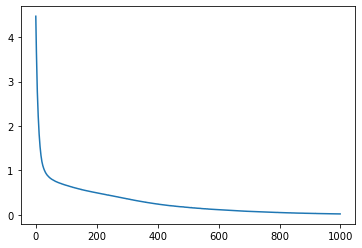

In [45]:
plt.plot(hist.history['loss'])
print(hist.history['loss'][-1])

#### 연습: 다음 모형을 구성하라.

<img src="https://psu1.github.io/DeepRNN/deepRnn.png">

## RNN의 장단점

- 분석에 위치정보를 명시적으로 고려할 수 있다.
- input 길이에 제한이 없고 model의 크기는 input 크기와 무관하게 결정된다. 


- 계산이 순차적으로 이루어지므로 계산에 시간이 많이 걸린다.
- sequence가 길어지면 과거 input에 대한 정보를 고정된 길이의 vector에 압축해야 하기 때문에 여러가지 문제가 발생
  - vanishing and exploding gradient - LSTM, GRU
  - long term dependency - LSTM, GRU, bidirectional
  - sequential computing
  - fixed input size


- [Attention Is All You Need](https://arxiv.org/abs/1706.03762)

## Long Short-Term Memory (LSTM)

RNN에서 state의 정보는 $h$ 하나의 변수에 저장된다. <br>
Update과정에서 사용하는 weight matrix의 eigenvalue 중 하나 이상의 절대값이 1보다 크거나 0에 가까운 경우 입력 sequence가 길어지면서 문제가 발생할 수 있다. <br>


<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" width="500">

$$h_t = U h_{t-1} + V x_t$$

- LSTM은 전체 sequence를 관통하는 새로운 cell state $C$을 이용하여 정보의 양을 통제하여 긴  sequence로 인해 발생하는 문제를 완화한다.


- Hidden state $h_t$를 단기 상태(short-term state, update된 정보 ), cell state $C_t$를 장기 상태(long-term state, memory)로 해석한다.


- 모든 gate에서는 sigmoid를 이용하여 계산한 activation vector를 이용하여 cell state vector와 hidden state vector의 정보량을 조정한다. 정보량의 조정과 update는 element-wise 곱(&#8855;)을 사용한다.


- LSTM에선 tanh를 이용하며 이는 정보량을 (-1,1)사이로 정규화시킬 수 있고 gradient의 범위가 sigmoid에 비해 더 크기 떄문에 vanishing gradient 문제를 완화시킬 수 있기 때문이라고 알려져 있다.











이 문제를 완화하기 위해 sequence를 관통하는 새로운 cell state $C$과 정보의 양을 통제하는 element-wise multiplication(&#8855;)과 합(&#8853;)을 이용하여 weight matrix에 해당하는 값을 update한다.

- $h_t$를 단기 상태(short-term state), $C_t$를 장기 상태(long-term state)로 해석한다.

- gate는 sigmoid를 activation 함수로 사용한 hidden layer로 pass된 값을 끄고 켜는 역할을 한다.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" width="500">
<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png" width="400">



[참고 블로그](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)

gate의 역할 - binary step function을 사용한 예

$$ \sigma \otimes x 
= \begin{bmatrix} 1 \\ 0 \\ \vdots \\ 1 \end{bmatrix}
\otimes \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}
= \begin{bmatrix} x_1 \\ 0 \\ \vdots \\ x_n \end{bmatrix}
$$

"나는 사과를 좋아합니다."과 같은 구조의 문장을 이용해 과일에 대한 선호를 분석한다면 "나는"을 "잊도록"할 필요가 있다.

### Update cell state 

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png" width="500">

### forget gate unit

- 넘겨받은 cell state에 포함된 정보들의 중요도에 따라 보존하거나 증폭, 혹은 삭제하기도 한다.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png" width="500">

$$f_t = \sigma (W_f\cdot h_{t-1} + U_f \cdot x_t + b_f )$$

### input/update gate units

- $\tanh$을 이용하여 새로 추가되는 정보 $\tilde{C}_t \in [-1,1]$를 얼마나 cell gate에 반영할 것인지 $i_t \in [0,1]$로 조정한다. <br>

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png" width="500">

$$\begin{eqnarray}
i_t &=& \sigma (W_i\cdot h_{t-1} + U_i \cdot x_t + b_i )\\
\tilde{C}_t &=& \tanh (W_C\cdot h_{t-1} + U_C \cdot x_t + b_C )
\end{eqnarray}$$


- $\tanh$을 이용하여 $(-1,1)$로 정규화된 input, $\tilde{C}_t$를 input gate $i_t$와 element-wise로 곱한다.<br>
- Input의 원소를 input gate로 켜고 끄는 단계이다.

### forget & input gate

- $f_t$와 $i_t$의 원소는 0과 1사이의 값으로 과거 cell state와 새로운 정보를 조절하여 다음 기의 cell state vector와 hidden state vector의 값을 결정하는데 사용한다.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png" width="500">


Forget gate $f_i$로 이전 기의 정보 $C_t$ 중 중요하지 않은 부분을 걸러내고 새로운 정보와 가중평균을 구하여 다음 기로 넘긴다.

### output stage

- 이번 cell의 정보(vanilla RNN의 정보와 동일) 중에서 output으로 넘길 정보의 양을 통제한다.
- output gate의 activation function으로는 hyperbolic tangent function이나 선형함수를 사용한다.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png" width="500">

## Variants

### Peephole connection

모든 gate의 입력에 cell state의 정보를 포함시킨다. 보다 '다양한' context를 고려할 수 있다.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-peepholes.png" width="600">

`use_peepholes=True`
`tf.keras.experimental.PeepholeLSTMCell`


### Coupled gates

Forget gate와 input gate 중 하나만 활성화 시킨다.<br>
의미있는 input이 없다면 cell state를 update하지 않고 forget gate를 활성화 시킨다.<br>
반대로 유의한 input이 있다면 forget gate를 꺼버린다.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-tied.png" width="600">

### Gated Recurrent Unit (GRU)

Cell state와 hidden state를 통합하고, <br>
forget gate와 update gate 역시 'update gate'로 대체한 것이다. <br>
구조가 간단하고 추정해야 할 모수의 수가 확연히 줄어 계산속도에 장점이 있다.

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png" width="600">

GRUCell



### Vanila RNN vs. LSTM

Vanila RNN이 LSTM의 특별한 경우는 아니다.

$$\begin{eqnarray}
f_t &=& \sigma (W_f\cdot h_{t-1} + U_f \cdot x_t + b_f )\\
i_t &=& \sigma (W_i\cdot h_{t-1} + U_i \cdot x_t + b_i )\\
\tilde{C}_t &=& \tanh (W_C\cdot h_{t-1} + U_C \cdot x_t + b_C )\\
C_t & = & f_t \times C_{t-1} + i_t \times \tilde{C}_t\\
o_t & = & \sigma\left(W_o\cdot h_{t-1} + U_o \cdot x_t + b_o \right)\\
h_t & = & o_t \times \tanh(C_t)
\end{eqnarray}$$


$f_i = 1$이고 $i_t=0$이라면 $C_t = C_{t-1} = \cdots = C_0$이 되고, 따라서 output은 모든 $t$에 대해,

$$o_t = \sigma(W_o h_0 + U_o x_t + b_o)$$

하지만 vanila RNN의 경우

$$o_t = \sigma(W^t h_0 + U x_t + b)$$





In [46]:
from tensorflow.keras.layers import LSTM

model = Sequential(name=LSTM)
model.add(LSTM(1, input_shape=(1, 2)))
#model.add(Dense(1))

model.summary()

Model: "<class 'keras.layers.recurrent_v2.LSTM'>"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 16        
                                                                 
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


모수는 세가지 종류로 $U, W, b$ 행렬 혹은 vector가 4개의 step `f, i, C, o`에 대해 정의가 된다.

In [47]:
print(model.get_weights()[0].shape)
print(model.get_weights()[1].shape)
print(model.get_weights()[2].shape)

(2, 4)
(1, 4)
(4,)


## RNN과 Attention

- RNN 모형의 가장 큰 약점은 not scalable
- Transfer learning이 어렵다. 거의 불가능하다.
- 병렬연산이 불가능하므로 모형이 커지면 computer의 성능이 문제가 될 수 있다.
  - RNN과 마찬가지로 LSTM의 모든 유닛에서 사용하는 weight들이 서로 관련이 되어 있다. 즉 한 유닛의 weight를 독립적으로 update할 수 없으므로 훈련시켜야 하는 parameter의 수는 timesteps 크기의 제곱에 비례하여 커진다.

 이에 대한 대안으로 등장한 것이  attention mechanism이다. 이 개념의 등장으로 input과 ouput의 관계는 hidden layer의 수에 이전과 같은 큰 제한을 받지 않게 되었다.
- CNN은 병렬연산이 가능하므로 이를 attention mechanism과 결합한 것이 transformer이다. 그리고 동일한 구조의 입력의 제약을 없앤 것을 Transformer-XL 이라고 부른다. [참고](https://medium.com/ml2b/introduction-to-compressive-transform-53acb767361e
), [참고](https://towardsdatascience.com/transformers-141e32e69591)


- 아직까지도 sequence의 길이가 충분히 길다면 LSTM을 사용하는 것이 현실적인 방법이다.